# Estudo dos tamanhos das *bounding boxes* VDAO

Este notebook tem como objetivo fazer um levantamento das áreas dos bounding boxes da base [**Video Database of Abandoned Objects in a Cluttered Industrial Environment (VDAO)**](http://www02.smt.ufrj.br/~tvdigital/database/objects/page_01.html).

Parte do código do projeto [VDAO_Access](https://github.com/rafaelpadilla/DeepLearning-VDAO/tree/master/VDAO_Access) foi utilizado como suporte para este notebook.

As áreas foram obtidas através dos arquivos de anotação distribuídos juntos com a VDAO.

In [1]:
%load_ext autoreload

In [2]:
# Importando os pacotes necessários
import sys
import os
import numpy as np
import glob
sys.path.append('../VDAO_Access')
from Annotation import Annotation
from utils import getAllFilesRecursively
import re
import pandas as pd

## Fazendo a leitura dos arquivos de anotação

Para a execução deste notebook, é necessário fazer o downlod dos arquivos de anotação, indetificando o caminho da pasta na variável `vdao_dir`

In [3]:
# Definindo pasta com os vídeos e arquivos de anotação da VDAO
vdao_dir = '/media/storage/VDAO/vdao_object'
# Obtém todos os arquivos de anotação
annot_files = getAllFilesRecursively(vdao_dir, 'txt')

all_areas = {}
# Para cada arquivo, obtemos um objeto Annotation, que facilita a obtenção da área dos bounding boxes
for file in annot_files:
    # Obtém objeto Annotation e as respectivas áreas contidas no arquivo de anotação
    annot = Annotation(annotationFilePath=file)
    areas = annot.GetObjectsArea()
    # Adiciona no dicionário all_areas cada uma das áreas
    for k, v in areas.items():
        if k not in all_areas:
            all_areas[k] = []
        all_areas[k] = all_areas[k] + v

# Para cada classe, obtém métricas (área mínima, área máxima, área média, etc)
stats_by_classes = []
for k, v in all_areas.items():
    stats_by_classes.append({'object': k, 
                             'min': np.min(v), 
                             'max': np.max(v), 
                             'avg': np.average(v), 
                             'total_bb': len(v)})

## Exibindo áreas dos *bounding boxes* para cada classe de objeto

In [4]:
# Criamos um data frame para exibição dos resultados
df = pd.DataFrame(stats_by_classes) 
df.rename(columns={'object':'objeto',
                   'min':'área mínima',
                   'max':'área máxima',
                   'avg':'área média',
                   'total_bb':'bounding boxes'},inplace=True)
df.set_index('objeto', inplace=True)
# Pegamos a maior e menor bounding box
print('Maior bounding box: %d' % df['área máxima'].max())
print('Menor bounding box: %d' % df['área mínima'].min())
df

Maior bounding box: 697680
Menor bounding box: 0


,área média,área máxima,área mínima,bounding boxes
objeto,,,,
shoe,37980.598077,107802,0,12169
darkBlueBox,55049.803807,315200,0,18966
cameraBox,62355.288587,378225,0,28144
whiteJar,16168.074445,32224,0,10988
brownBox,41322.761228,145280,0,11534
caixa,28169.185674,43432,0,2806
pinkBottle,14294.319691,38824,0,17592
toalha,92129.322861,461892,0,32085
blackCoat,106365.089666,594940,0,31517


## Histogramas

In [5]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


### Separados por classes:

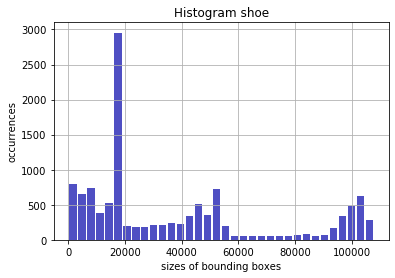

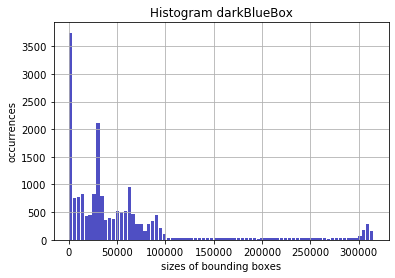

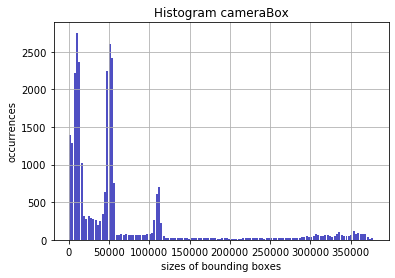

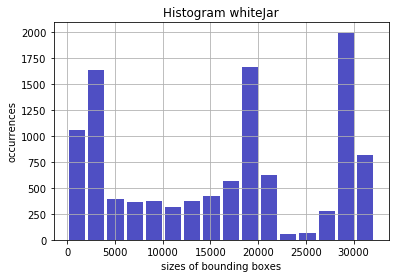

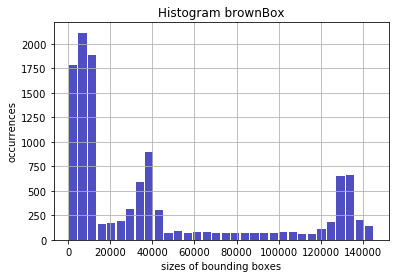

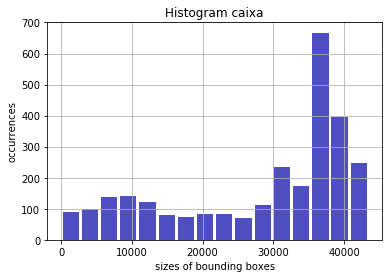

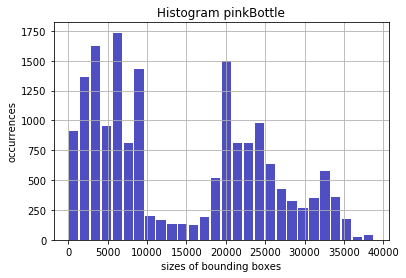

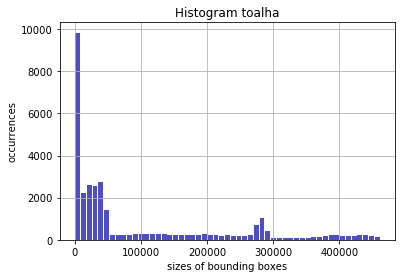

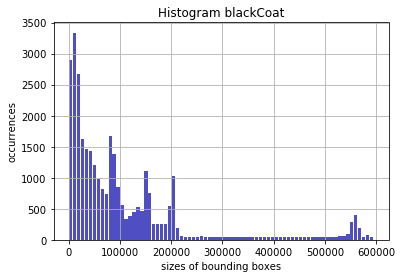

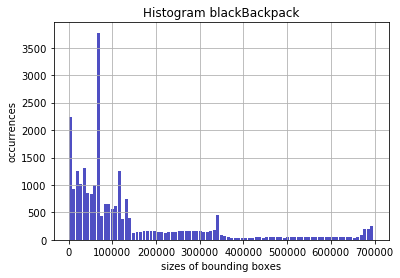

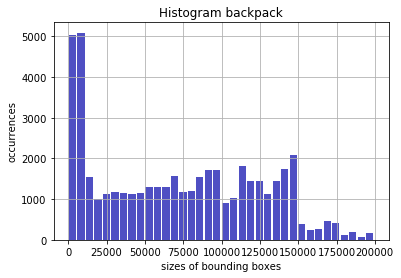

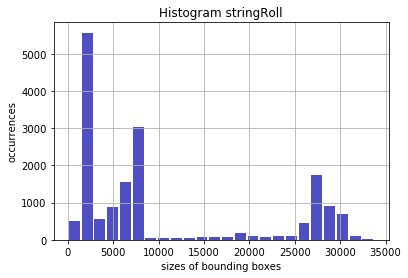

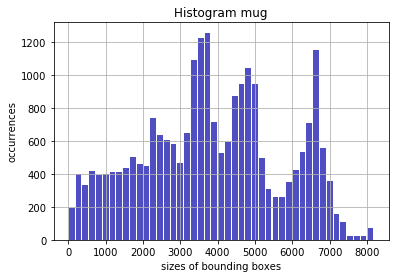

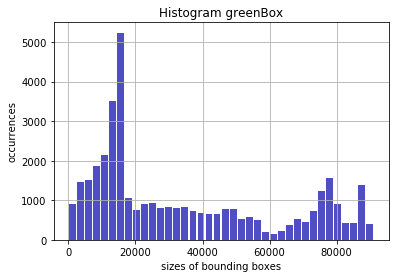

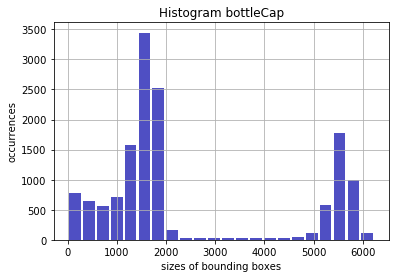

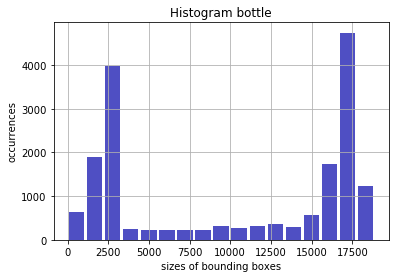

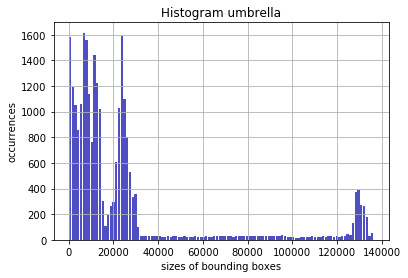

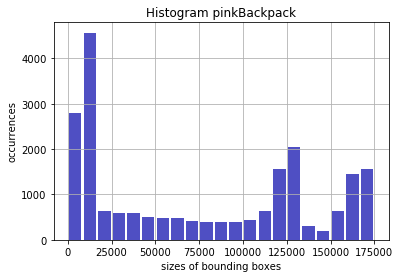

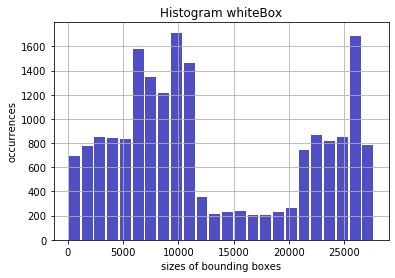

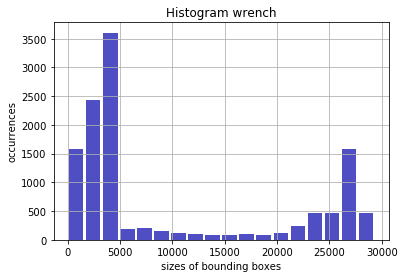

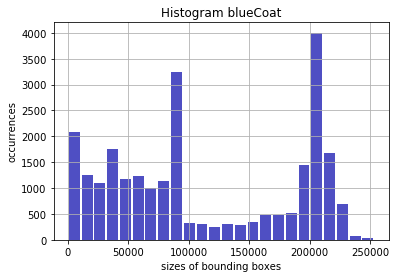

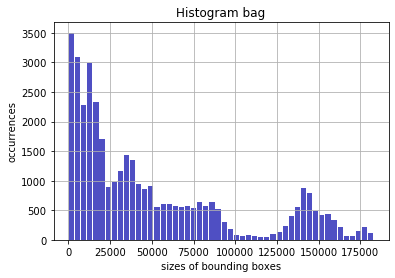

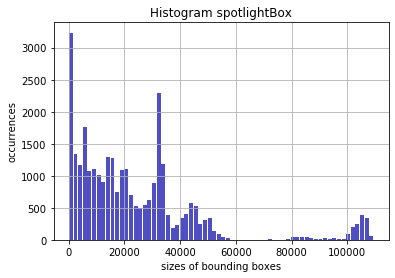

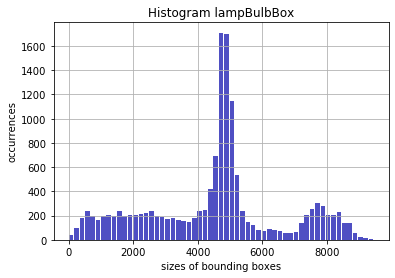

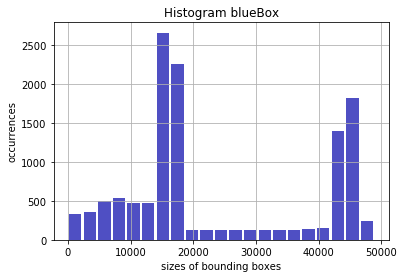

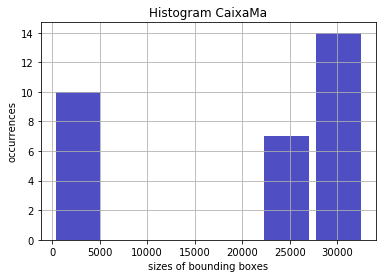

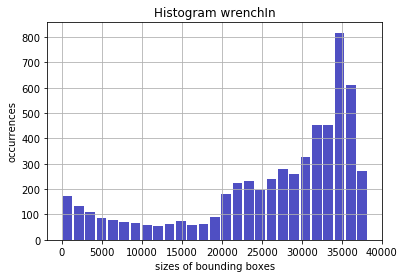

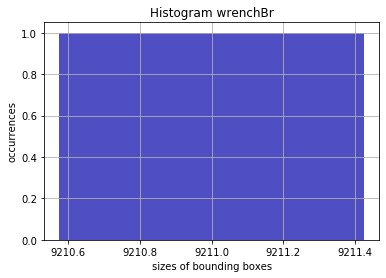

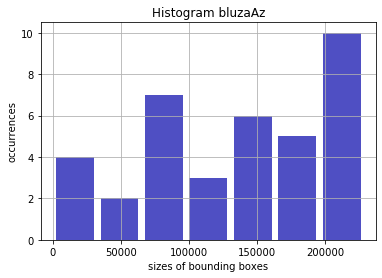

In [6]:
%matplotlib inline
# Importing matplotlib and generate individual histogram for each class
import matplotlib.pyplot as plt

for k, v in all_areas.items():
    n, bins, patches = plt.hist(x=v,bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.xlabel('sizes of bounding boxes')
    plt.ylabel('occurrences')
    plt.title('Histogram %s' % k)
    plt.grid(True)
    plt.show()

### Sem distinção de classes

A seguir mostramos um histograma considerando todos os **bounding boxes** da base VDAO.

<IPython.core.display.Javascript object>


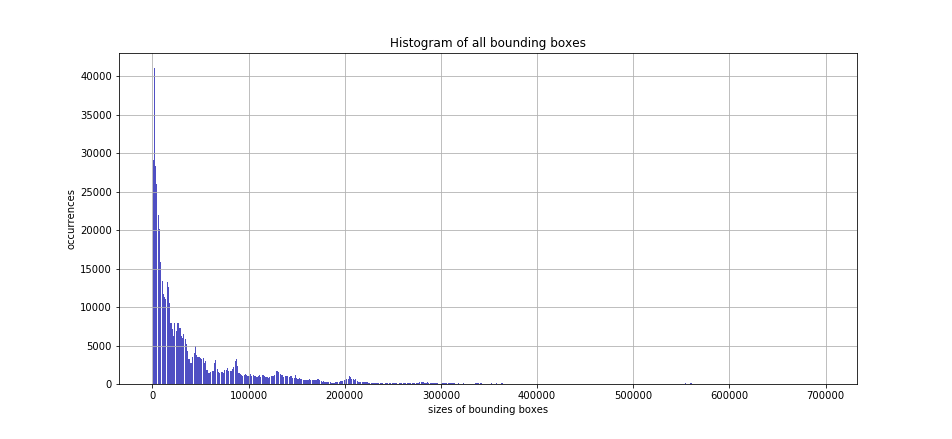

In [8]:
%matplotlib notebook
all_sizes = []
for _, v in all_areas.items():
    all_sizes += v
    

n, bins, patches = plt.hist(x=all_sizes,bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.xlabel('sizes of bounding boxes')
plt.ylabel('occurrences')
plt.title('Histogram of all bounding boxes')
plt.grid(True)
plt.show()  


## Apresentação em forma de tabela

A seguir os tamanhos dos **bounding boxes** são exibidos em forma de tabela. Nota-se a existência de 1611 **bounding boxes** com área igual a 0.

In [9]:
import collections
occurrences = collections.Counter(all_sizes)
dict_occurrences = collections.OrderedDict(sorted(occurrences.items()))
df = pd.DataFrame.from_dict(dict_occurrences, orient='index')

df.rename(columns={0:'ocorrências'},inplace=True)
df.index.names = ['área bounding box']

df

,ocorrências
área bounding box,
0,1611
4,1
8,1
19,8
20,1
22,1
23,2
24,7
25,2
